# Credit Card Fraud Detection: Part 1 Data exploration and visualization

## Introduction 

Fraudulent transactions are the major problem for e-commerce business today.

Fraud detection is a classification problem of the credit card transactions with two classes of legitimate or fraudulent.

The credit card transaction datasets are highly imbalanced. Also due to privacy reasons, in the sitive customer transaction data the field names are usually changed so each attribute may be equally treated without giving any preference
to any attribute in the dataset.

## Data source

Here we are going to do develop a credit card fraud detection model using a credit card transaction dataset.
Here I used UCSD DataMining Contest 2009 Dataset that can be downloaded from https://www.cs.purdue.edu/commugrate/data/credit_card/

Also another dataset is available from kaggle at https://www.kaggle.com/dalpozz/creditcardfraud

other source of data: see https://www.quora.com/Where-can-I-find-data-sets-for-credit-card-fraud-detection-project-in-DATA-MINING

https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/

http://weka.8497.n7.nabble.com/file/n23121/credit_fruad.arff

Here I used UCSD DataMining Contest 2009 Dataset that contains two versions of the
dataset: “easy” and “hard” versions. I use the
“hard” version for the evaluation of the model.

Lets look at one of the files, named "DataminingContest2009.Task1.Train.Inputs"

In [1]:
## First line

fp=open('Credit card data\DataminingContest2009.Task1.Train.Inputs')
#print(fp.read())
print(fp.readline())
fp.close()

amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5



In [2]:
## the first 2 lines

with open('Credit card data\DataminingContest2009.Task1.Train.Inputs') as fp:
    i=0
    for line in fp:
        print(line)
        i+=1
        if i>1:
            break
        
        

amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5

12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1



In [3]:
## Another way to print the first N line
N=2
with open('Credit card data\DataminingContest2009.Task1.Train.Inputs') as fp:
    head = [next(fp) for i in range(N)]
print(head)

['amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5\n', '12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1\n']


**It looks like a comma separated file (csv), so we can read the whole file as a DataFrame.**

In [4]:
import pandas as pd
my_data=pd.read_csv('Credit card data\DataminingContest2009.Task1.Train.Inputs')
my_data.head()

,amount,hour1,state1,zip1,field1,domain1,field2,hour2,flag1,total,field3,field4,field5,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,CA,925,3,AOL.COM,1,0,1,12.95,-4276,7,0,1,0,1,1,0,1
1,11.01,0,CA,925,3,AOL.COM,1,0,1,11.01,-4276,7,0,1,0,1,1,0,1
2,38.85,0,CA,928,3,HOTMAIL.COM,1,0,0,38.85,2602,21,1,0,0,0,0,0,1
3,25.90,0,NJ,77,0,AOL.COM,1,0,0,25.90,4139,6,0,0,0,1,1,0,1
4,12.95,0,CA,945,3,YAHOO.COM,0,0,1,12.95,3826,9,1,0,0,1,0,0,1


We can get a summary information from data frame. It has 94682 rows (instances) and 19 columns (attributes).

In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94682 entries, 0 to 94681
Data columns (total 19 columns):
amount        94682 non-null float64
hour1         94682 non-null int64
state1        94682 non-null object
zip1          94682 non-null int64
field1        94682 non-null int64
domain1       94681 non-null object
field2        94682 non-null int64
hour2         94682 non-null int64
flag1         94682 non-null int64
total         94682 non-null float64
field3        94682 non-null int64
field4        94682 non-null int64
field5        94682 non-null int64
indicator1    94682 non-null int64
indicator2    94682 non-null int64
flag2         94682 non-null int64
flag3         94682 non-null int64
flag4         94682 non-null int64
flag5         94682 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 13.7+ MB


**Let's look at another training set marked by task2**

DataminingContest2009.Task2.Train.Inputs'

In [6]:
mydata2=pd.read_csv('Credit card data\DataminingContest2009.Task2.Train.Inputs')
mydata2.head()

,amount,hour1,state1,zip1,custAttr1,field1,custAttr2,field2,hour2,flag1,total,field3,field4,indicator1,indicator2,flag2,flag3,flag4,flag5
0,12.95,0,WA,986,1234567890123456,0,luhxsodzmjhng7@comcast.net,0,0,0,12.95,-723,19,0,0,0,0,0,1
1,38.85,0,WA,980,1234567890123457,3,pfixyiqfpvkcg@zjyxs.net,1,0,0,38.85,5497,14,1,0,0,1,0,1
2,38.85,0,KY,402,1234567890123458,2,shbjoldciswwm@aol.com,1,0,0,38.85,-4420,23,0,0,1,1,0,1
3,12.95,0,CA,958,1234567890123459,3,ipbvtdfkhhfws@sbcglobal.net,0,0,0,12.95,5010,31,0,0,1,0,0,1
4,38.85,0,GA,300,1234567890123460,3,ivfuvxiennhdp@bellsouth.net,1,0,0,38.85,-4074,21,0,0,1,0,0,1


In [7]:
mydata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
amount        100000 non-null float64
hour1         100000 non-null int64
state1        99999 non-null object
zip1          100000 non-null int64
custAttr1     100000 non-null int64
field1        100000 non-null int64
custAttr2     100000 non-null object
field2        100000 non-null int64
hour2         100000 non-null int64
flag1         100000 non-null int64
total         100000 non-null float64
field3        100000 non-null int64
field4        100000 non-null int64
indicator1    100000 non-null int64
indicator2    100000 non-null int64
flag2         100000 non-null int64
flag3         100000 non-null int64
flag4         100000 non-null int64
flag5         100000 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 14.5+ MB


As we see above

Task 2 data set (the hard data set) has 100000 rows (instances=customers?) and 20 columns (attributes).

Let's see how many unique customers there are in this data set 

In [8]:
len(mydata2.custAttr1.unique())

73729

we look at the customer attr1, and realized that there are 73729 unique customers out of 100000 entries.

It seems that that custAttr1 is the account/card number and custAttr2 is e-mail id of the customer. These fields should be unique to a particular customer. The fields total and amount as well as hour1 and
hour2 are found to be the same for each customer and Similarly state1 and zip1 are
also found to be representing the same information.All other fields are anonymized.

In [9]:
mydata2['indicator2'].unique()

array([0, 1], dtype=int64)

In [10]:
mydata2['flag5'].unique()

array([   1,    2,    4, 3278,    3,  373,   21,  364, 1434,    5,   23,
          9,    8,    7, 1600,   98,  977,    0,  118,    6, 1643,  983,
        100,  119], dtype=int64)

### Class labels

To this point, we explored the Task1 and Task 2 data sets. It's worth nothing that these two data sets are the sets that named easy and hard data sets, but both contain transaction data. 

For a supervised machine learning, we need training data to be labeled; in this case labeled as "legitimate" or "fradulent". If you noticed, in the above mentined data sets (Task 1 and Task 2), we did not see any columns to declare labels. so the labels should be in a different tables. Lets look at the other files:

* DataminingContest2009.Task1.Train.Targets

* DataminingContest2009.Task2.Train.Targets

In [11]:
classes_task1=pd.read_csv('Credit card data\DataminingContest2009.Task1.Train.Targets', header= None)
classes_task1.head()

,0
0,0
1,0
2,0
3,0
4,0


This a data frame containg only one column, apparantly all zeros. This could be our labels if it include 1 as well. 0 for legitimate and 1 for fradualent as binary classes.

In [12]:
print ("the info\n", classes_task1.describe())
print ("number of 1 occurance", classes_task1.sum())

the info
                   0
count  94682.000000
mean       0.022116
std        0.147062
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
number of 1 occurance 0    2094
dtype: int64


**Interstingly, number 1 apperas 2094 times in this one.**

Lets look at the other file.

In [13]:
classes_task2=pd.read_csv('Credit card data\DataminingContest2009.Task2.Train.Targets',header=None)
print ("the info\n", classes_task2.describe())
print ("number of 1 occurance", classes_task2.sum())

the info
                    0
count  100000.000000
mean        0.026540
std         0.160735
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
number of 1 occurance 0    2654
dtype: int64


**so Task 2 contains 2654 fradulent cases out of 100,000 transactions. So the data set is fairlt imbalanced**

## Exploratory data analysis

Let's do some exploratory analysis. We want to dive into the data set and try to pull out as much information as we can.

The following question may be answered by just looking into the data set:

* What state has the most number of fradulant transactions?
* What time does the frauds occur?

#### 1) The amount of transactions for each state. 

Can you tell which state has the highest number and amount of transaction?

**As you will see below california with 19717 transactions**

see https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ for aggregation in Python

In [14]:
mydata2['amount'].groupby(mydata2['state1']).describe().sort_values('count', ascending=False)
# mydata2['amount'].groupby(mydata2['state1']).count().reset_index().sort_values('amount', ascending=False)
# mydata2.groupby(['state1']).groups.keys()   ## set_index=False to avoid index to be states
# len(mydata2.groupby(['state1']).groups['CA'])   ## 19717

,count,mean,std,min,25%,50%,75%,max
state1,,,,,,,,
CA,19717.0,27.252291,14.413716,0.00,12.95,31.08,38.85,59.95
FL,8055.0,27.313007,14.326525,0.00,12.95,31.08,38.85,59.40
TX,6785.0,27.569216,14.573155,0.00,12.95,31.08,38.85,59.95
NY,6566.0,27.821532,14.494486,0.00,12.95,31.08,38.85,59.95
GA,4105.0,26.604626,14.176711,0.00,12.95,25.90,38.85,59.95
IL,3963.0,27.396500,14.373903,0.00,12.95,31.08,38.85,59.40
VA,3779.0,27.421604,14.273298,0.00,12.95,31.08,38.85,59.40
AZ,3216.0,27.368252,14.297015,0.00,12.95,31.08,38.85,59.40
NJ,2900.0,28.431893,14.602078,0.00,12.95,34.31,38.85,59.40


**California has the highest total amout of transactions with 537333.42.**

In [15]:
total_transact=mydata2['amount'].groupby(mydata2['state1']).sum().reset_index().sort_values('amount', ascending=False)
total_transact.head()

,state1,amount
6,CA,537333.42
11,FL,220006.27
46,TX,187057.13
36,NY,182676.18
12,GA,109211.99


In [16]:
aggregations = {
   # 'amount':[count,sum],
    'amount': lambda x: sum(x)
}
mydata2.groupby('state1',as_index=False).agg(aggregations).sort_values('amount', ascending=False).head()

,state1,amount
6,CA,537333.42
11,FL,220006.27
46,TX,187057.13
36,NY,182676.18
12,GA,109211.99


Lets plot this data on a map. It is supposed to show the number of transations/total amount of transactions for each state. 
I am going to use plotly

See tutorials here:

https://www.youtube.com/watch?v=hA39KSTb3dY <br>
https://plot.ly/python/choropleth-maps/

In [17]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='mehdiomid', api_key='pSLtOxFe3mvz7hesHW1M')
# register a free account at plotly and then put your username and api_key here

data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = total_transact['state1'],
        z = total_transact['amount'].astype(float),
        locationmode = 'USA-states',
        text = total_transact['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]

layout = dict(
        title = 'Total amout of transactions<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='transaction-map' )

Now let's look at the number of transaction for each state

In [18]:
data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = mydata2['amount'].groupby(mydata2['state1']).count().reset_index()['state1'],
        z = mydata2['amount'].groupby(mydata2['state1']).count().reset_index()['amount'].astype(float),
        locationmode = 'USA-states',
        text = mydata2['amount'].groupby(mydata2['state1']).count().reset_index()['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No. of transaction")
        ) ]

layout = dict(
        title = 'Number of transactions<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='number_of_transaction-map' )

### 2) Number of fradulant transactions per state
Lets look at the fradulant transactions. <br>
First lets add class of transactions (legitimate 0, or fradulant 1) to the data frame.

**As seen below, CA, LA, TN, FL and TX have the highest amount of fradulant transactions.**

In [19]:
mydata2['class']=classes_task2
fraud_by_state=mydata2['class'].groupby(mydata2['state1']).sum().reset_index().sort_values('class', ascending=False)
fraud_by_state.head()

,state1,class
6,CA,496
20,LA,460
45,TN,222
11,FL,152
46,TX,120


Lets plot it

In [20]:
data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = fraud_by_state['state1'],
        z = fraud_by_state['class'],
        locationmode = 'USA-states',
        text = fraud_by_state['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No of fraud. Tran.")
        ) ]

layout = dict(
        title = 'Total Number of fradulant transactions<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='No_of_fraud_transaction-map' )

**Here we see the LA state has a high number of fradualant transactions, whereas it's not among the sates with high number of transactions.** <br> so we better look at the number of fradulant transaction devided by total number of transactions for each state. 

In [22]:
aggregations = {
    'amount':'count',
    'class': 'sum'
    # 'class' : lambda x: sum(x)
  }
fraud_by_state_devided_by_transactions=mydata2.groupby('state1',as_index=False).agg(aggregations)
fraud_by_state_devided_by_transactions['fraud_per_totnum']=fraud_by_state_devided_by_transactions['class']/fraud_by_state_devided_by_transactions['amount']*100
fraud_by_state_devided_by_transactions.sort_values('fraud_per_totnum',ascending=False).head()

,state1,amount,class,fraud_per_totnum
20,LA,1689,460,27.235050
45,TN,1484,222,14.959569
3,AP,19,1,5.263158
19,KY,654,33,5.045872
35,NV,1487,67,4.505716


In [23]:
data_plotly = [ dict(
        type='choropleth',
        autocolorscale = True,
        locations = fraud_by_state_devided_by_transactions['state1'],
        z = fraud_by_state_devided_by_transactions['fraud_per_totnum'],
        locationmode = 'USA-states',
        text = fraud_by_state_devided_by_transactions['state1'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "No of fraud. Tran. per total number of transactions")
        ) ]

layout = dict(
        title = 'Total Number of fradulant transactions per total number of transactions in each state <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict( data=data_plotly, layout=layout )
py.iplot( fig, filename='No_of_fraud_transaction_per_transaction-map' )

**Now we see California is not among the states with the most amounts of fradulant transactions**

### 3) Fradulant transactions by hour

**As we see below, at 11, 13, 12 o'clock we see the most fradulant transactions happening**

In [24]:
aggregations = {
    'class': 'sum'
    # 'class' : lambda x: sum(x)
  }
fraud_by_hour=mydata2.groupby('hour1',as_index=False).agg(aggregations)
fraud_by_hour.sort_values('class',ascending=False ).head()

,hour1,class
11,11,274
13,13,265
12,12,250
14,14,225
10,10,198


Let's plot this as a bar chart, this time using matplotlib

#### Matplotlib plotting system

<IPython.core.display.Javascript object>


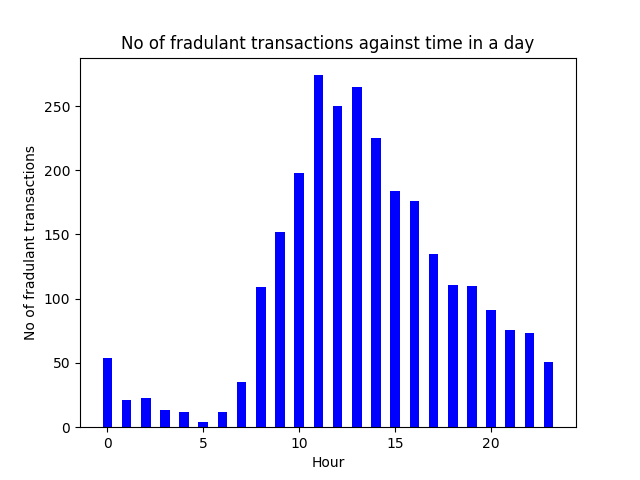

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
fig_bar, ax = plt.subplots()
rects1 = ax.bar(fraud_by_hour['hour1'], fraud_by_hour['class'], width=0.5, color='b')
# add some text for labels, title and axes ticks
ax.set_ylabel('No of fradulant transactions')
ax.set_xlabel('Hour')
ax.set_title('No of fradulant transactions against time in a day')
#ax.set_xticks(ind + width / 2)
#ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))

#ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))
plt.show()

The above graph shows the absolute number of fradulant transactions every hour, but we may actually need to 
look at the percent ratio of the number of fradulant transactions per total number of transactions.

In [26]:
aggregations = {
    'amount':'count',
    'class': 'sum'
    # 'class' : lambda x: sum(x)
  }
fraud_percent_by_hour=mydata2.groupby('hour1',as_index=False).agg(aggregations)
fraud_percent_by_hour['fraud_per_totnum']=fraud_percent_by_hour['class']/fraud_percent_by_hour['amount']*100
fraud_percent_by_hour.sort_values('fraud_per_totnum',ascending=False ).head()

,hour1,amount,class,fraud_per_totnum
11,11,6682,274,4.100569
13,13,7074,265,3.746113
12,12,6885,250,3.631082
14,14,6881,225,3.269874
10,10,6250,198,3.168000


#### Data frame plotting

<IPython.core.display.Javascript object>


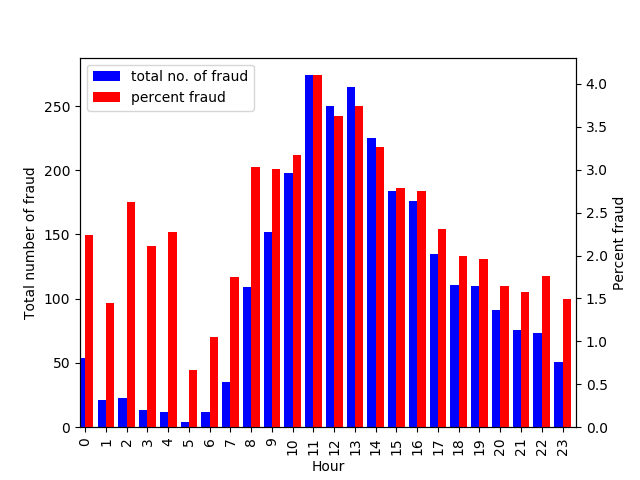

In [27]:
fig2 = plt.figure() # Create matplotlib figure

ax1 = fig2.add_subplot(111) # Create matplotlib axes
ax2 = ax1.twinx() # Create another axes that shares the same x-axis as ax.

width2 = 0.4

lns1=fraud_percent_by_hour['class'].plot(kind='bar', color='blue', ax=ax1, width=width2, position=1, label='total no. of fraud')
lns2=fraud_percent_by_hour.fraud_per_totnum.plot(kind='bar', color='red', ax=ax2, width=width2, position=0, label='percent fraud')

ax1.set_ylabel('Total number of fraud')
ax2.set_ylabel('Percent fraud')
ax1.set_xlabel('Hour')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2)
plt.show()

In this graph, I used data frame directly to make the plot. Note this is different from what we did in the last example. Also it has two y-axis with two different scales.

Interesting;y, the rate of fradulant transactions are high between 0 to 4 oclock, while the total number is low.

#### Patern recognition

In [28]:
fraud_by_state_hour=mydata2.groupby(['hour1','state1'],as_index=False).agg({'class':'sum'})
fraud_by_state_hour.sort_values('class',ascending=False ).head()

,hour1,state1,class
611,12,LA,79
560,11,LA,76
662,13,LA,64
648,13,CA,53
714,14,LA,49


It looks like **LA** at 12 oclock has the most fradulant transactions.

Let's make a plot to see the entire picture. First I try to do this with matplotlib. I want the number of frad. transactions on y axis, and the time in the day on the x-axis in a scatter plot, also I want the the points to be colored by the states.

This is like we have categorical variables (i.e. states) and we want to convert the satates to the colors. It is easy with ggplot in R, but pretty hard with matplotlib alone as the colors in matplotlib should be in RGB formats/color names. You cant pass the list of states to create colors. It has to first converted to RGB tuples (3 numbers between 0 and 1). and then use that list of tuples to make the colors. even with this making legends/colorbars requires extensive coding. Take a look to the code and the figure below. In the next step, we use seaborn, which is a wrapper around matplotlib to creat our desired plot in an easier way.

<IPython.core.display.Javascript object>


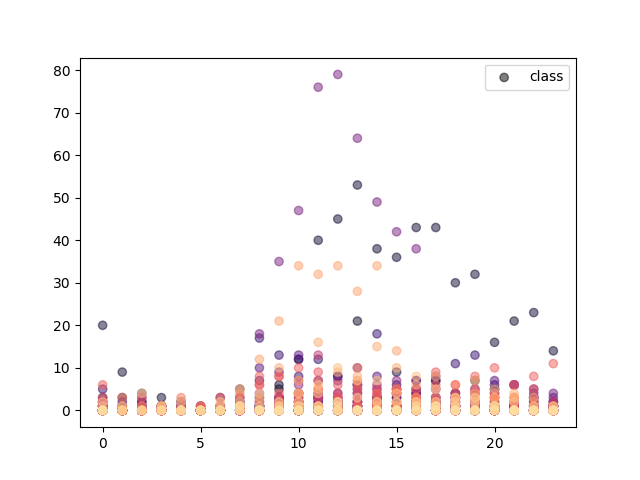

In [29]:
fig3,ax3 = plt.subplots() # Create matplotlib figure
#### creating colors ######
import numpy as np
cmap = plt.get_cmap('magma') #viridis
states=fraud_by_state_hour['state1'].unique()
colors = cmap(np.linspace(0, 1, len(states)))
colors_dict={key: value for (key, value) in zip(states,colors)}
colors_states=[colors_dict[state] for state in fraud_by_state_hour['state1'] ]
########
cax=ax3.scatter(fraud_by_state_hour['hour1'], fraud_by_state_hour['class'], alpha=0.5, c=colors_states)
plt.legend()
plt.show()

In [1]:
import seaborn as sns
#carat = [5, 10, 20, 30, 5, 10, 20, 30, 5, 10, 20, 30]
#price = [100, 100, 200, 200, 300, 300, 400, 400, 500, 500, 600, 600]
#color =['D', 'D', 'D', 'E', 'E', 'E', 'F', 'F', 'F', 'G', 'G', 'G',]
#df565 = pd.DataFrame(dict(carat=carat, price=price, color=color))

sns.lmplot('hour1', 'class', data=fraud_by_state_hour, hue='state1', fit_reg=False)

plt.show()

NameError: name 'fraud_by_state_hour' is not defined

It was much easier with seborn library.

This is the end of our exploratory data analysis in the next part (part 2), we will use our data to train a model to be able to identify the fradulant transactions.